<a href="https://colab.research.google.com/github/leman-cap13/kaggle_datasets_/blob/main/Laptop_Prices_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lmanqasml","key":"2d851a4eb9cae06770577185722326e0"}'}

In [68]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [69]:
!kaggle datasets download anubhavgoyal10/laptop-prices-dataset

Dataset URL: https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset
License(s): CC0-1.0
laptop-prices-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
import zipfile

In [71]:
with zipfile.ZipFile('/content/laptop-prices-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
df=pd.read_csv('/content/laptopPrice.csv')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


#DATA CLEANING AND DATA VISUALIZATION

In [75]:
df.isna().sum()

,0
brand,0
processor_brand,0
processor_name,0
processor_gnrtn,0
ram_gb,0
ram_type,0
ssd,0
hdd,0
os,0
os_bit,0


In [76]:
df.duplicated().sum()

np.int64(21)

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 17  Nu

In [79]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,802.000000,802.00000,802.000000
mean,76625.543641,299.84414,36.089776
std,45232.984422,1001.78442,118.313553
min,16990.000000,0.00000,0.000000
25%,45990.000000,0.00000,0.000000
50%,63990.000000,17.00000,2.000000
75%,89525.000000,140.25000,18.000000
max,441990.000000,15279.00000,1947.000000


In [80]:
df.dtypes

,0
brand,object
processor_brand,object
processor_name,object
processor_gnrtn,object
ram_gb,object
ram_type,object
ssd,object
hdd,object
os,object
os_bit,object


In [81]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col} üçün outlier sayı: {len(outliers)}")


Price üçün outlier sayı: 49
Number of Ratings üçün outlier sayı: 128
Number of Reviews üçün outlier sayı: 128


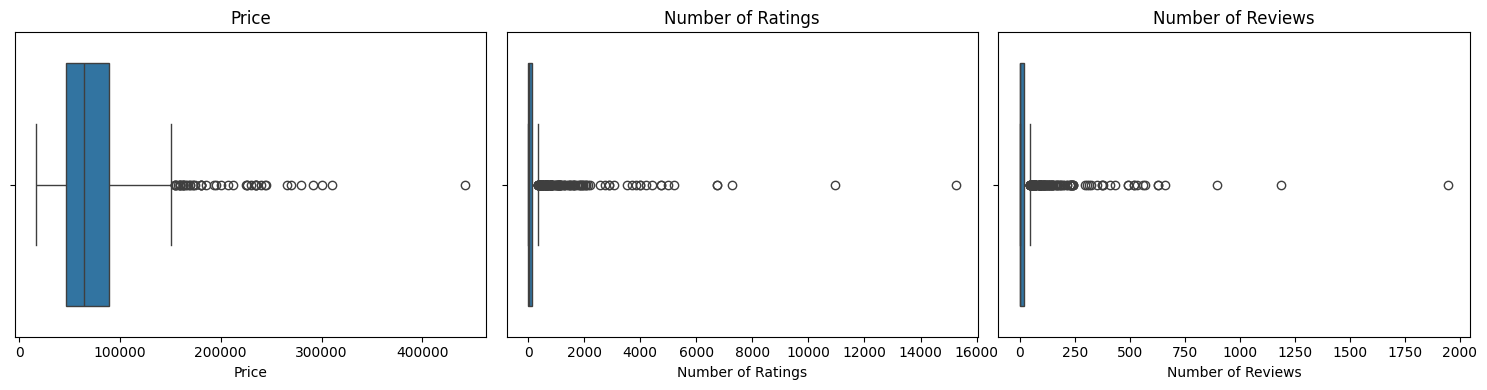

In [82]:
import math


numeric_df = df.select_dtypes(include=['float64', 'int64'])
cols = numeric_df.columns


n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


<ipython-input-83-68647ec00952>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x=col, palette = 'plasma')


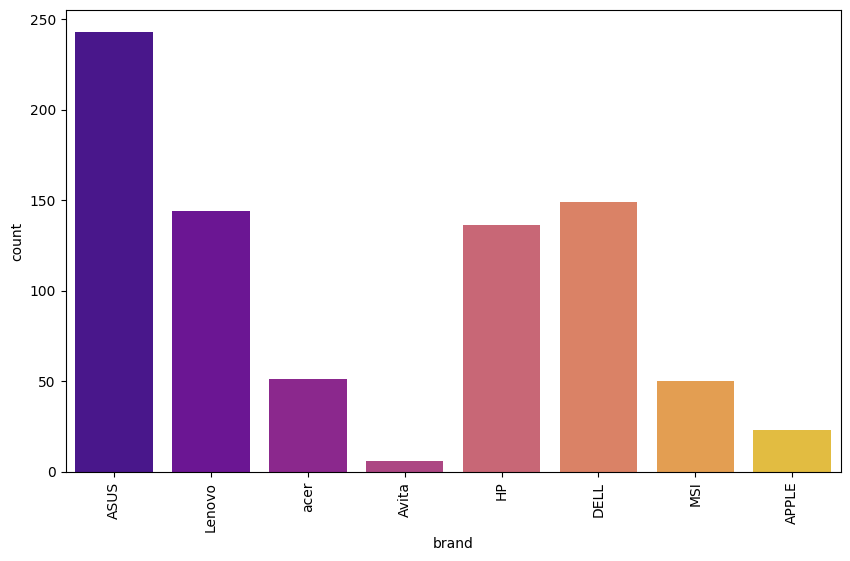

<ipython-input-83-68647ec00952>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x=col, palette = 'plasma')


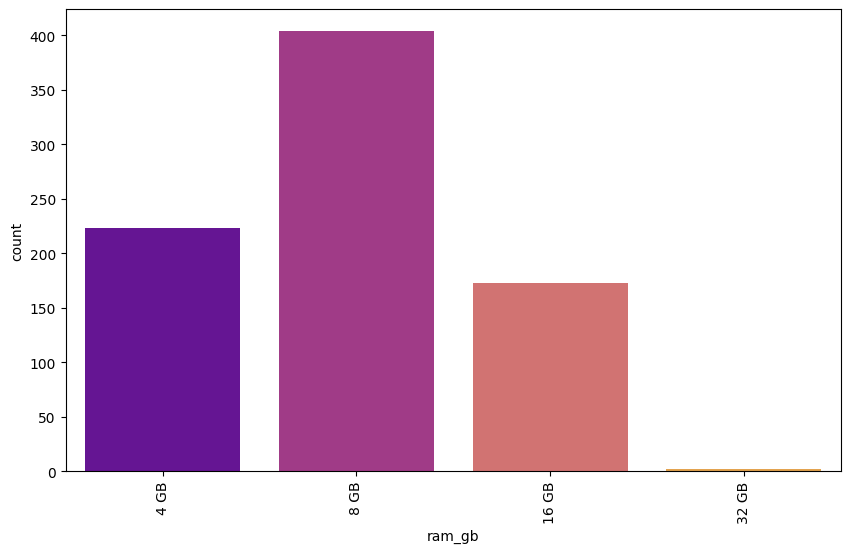

<ipython-input-83-68647ec00952>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x=col, palette = 'plasma')


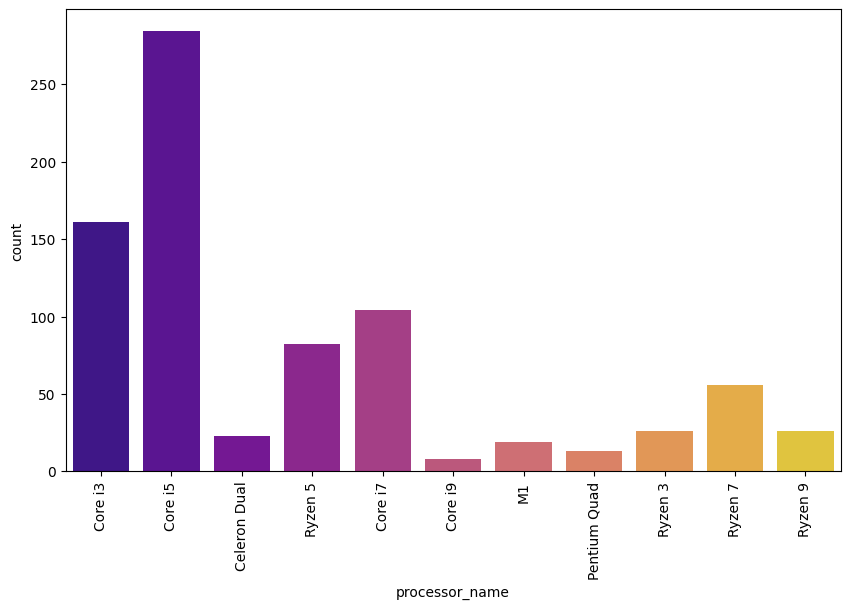

<ipython-input-83-68647ec00952>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x=col, palette = 'plasma')


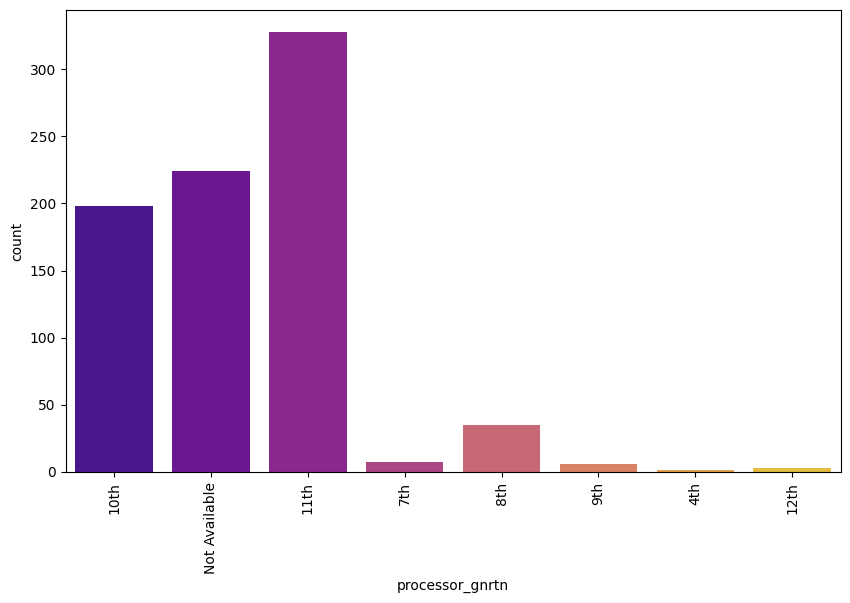

<ipython-input-83-68647ec00952>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x=col, palette = 'plasma')


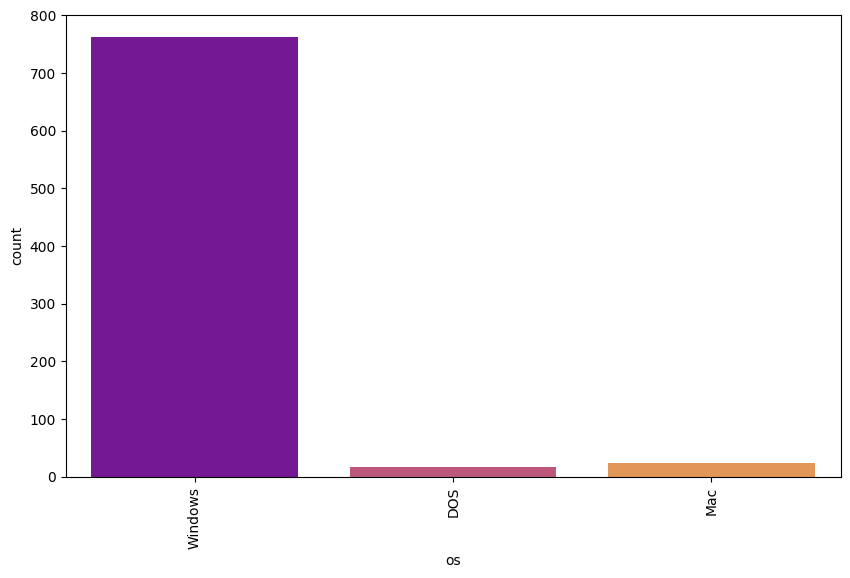

In [83]:
def dataplot(col):
    plt.figure(figsize= (10,6))
    sns.countplot(data = df, x=col, palette = 'plasma')
    plt.xticks(rotation = 'vertical')
    plt.show()

features = ['brand', 'ram_gb', 'processor_name', 'processor_gnrtn', 'os']

for col in features:
    dataplot(col)

<ipython-input-84-67473ee7e8e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['brand'], y=df['Price'], palette=palette)


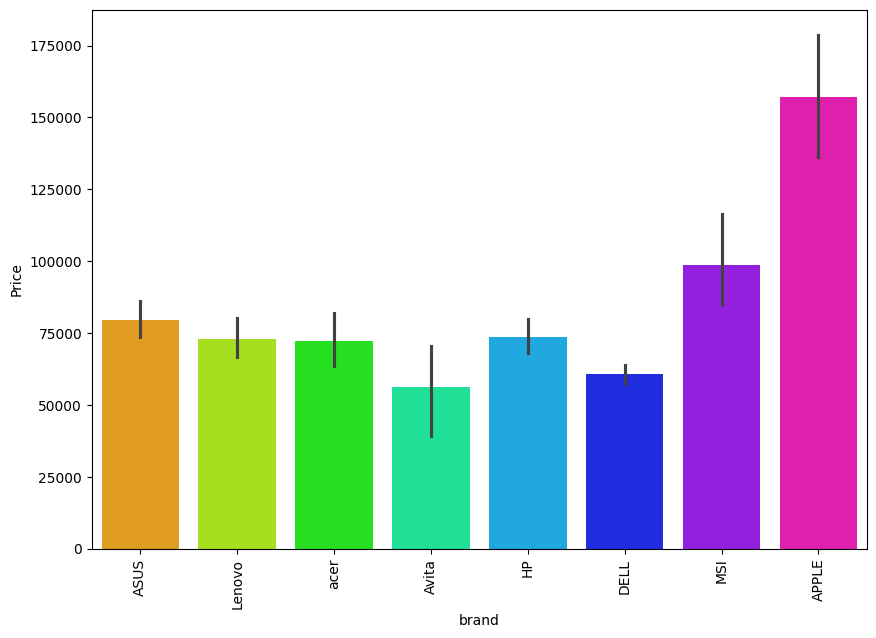

In [84]:
plt.figure(figsize=(10,7))
unique_brands = df['brand'].unique()
palette = sns.color_palette("hsv", len(unique_brands))
sns.barplot(x = df['brand'], y=df['Price'], palette=palette)
plt.xticks(rotation = 'vertical')
plt.show();

<ipython-input-85-105de551463d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Touchscreen'], y= df['Price'], palette = 'plasma')


<Axes: xlabel='Touchscreen', ylabel='Price'>

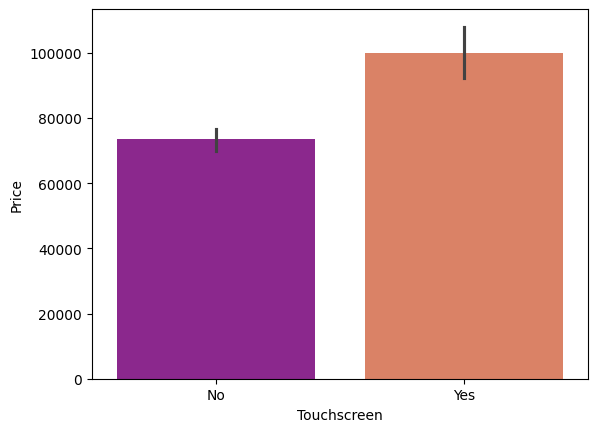

In [85]:
sns.barplot(x = df['Touchscreen'], y= df['Price'], palette = 'plasma')

<Axes: xlabel='ram_gb', ylabel='Price'>

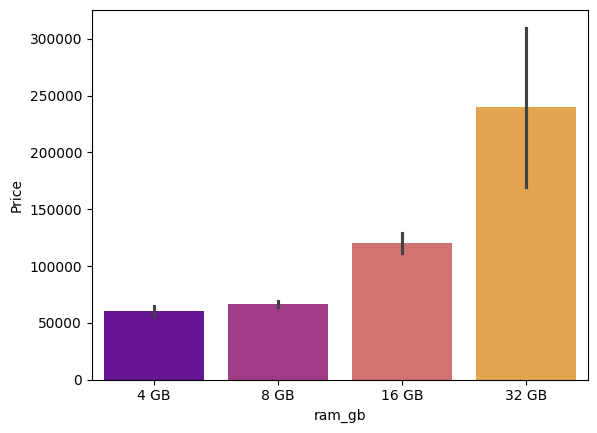

In [86]:
sns.barplot(x='ram_gb', y='Price', hue='ram_gb', data=df, palette='plasma', legend=False)

<Axes: xlabel='os', ylabel='count'>

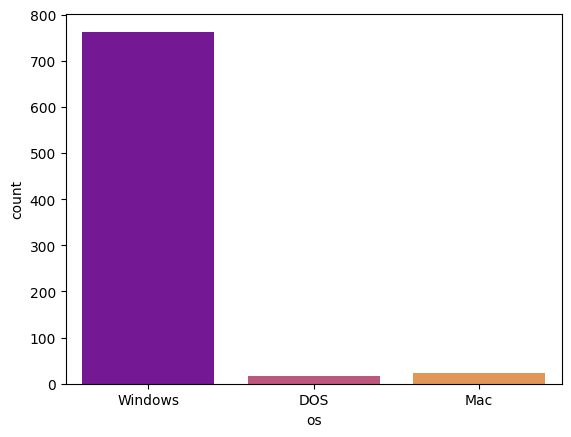

In [87]:
sns.countplot(x ='os', data=df, hue='os', palette='plasma')

<ipython-input-88-5e5862a56ca6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['os'], y= df['Price'], palette='magma')


<Axes: xlabel='os', ylabel='Price'>

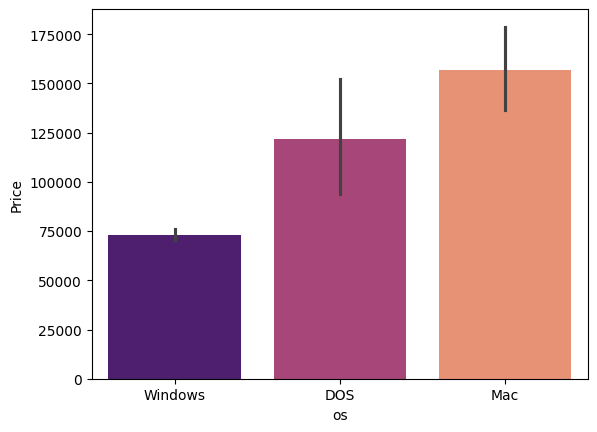

In [88]:
sns.barplot(x = df['os'], y= df['Price'], palette='magma')

<Axes: xlabel='Price', ylabel='Count'>

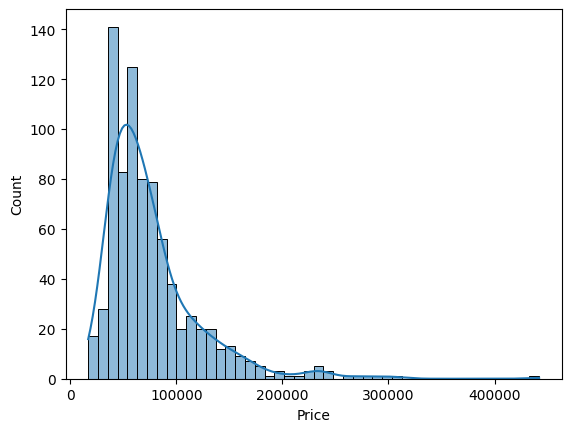

In [89]:
sns.histplot(df['Price'], kde=True)

In [90]:
def remove_outliers(df):
  numeric_df = df.select_dtypes(include=['float64', 'int64'])
  for column in numeric_df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return df

In [91]:
df=remove_outliers(df)

In [92]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [93]:
df['hdd']=df['hdd'].str.extract('(\d+)').astype('int')

In [94]:
df['hdd'].value_counts()

,count
hdd,
0,422
1024,100
512,13


In [95]:
df['ram_gb']=df['ram_gb'].str.extract('(\d+)').astype('int')

In [96]:
df['ram_gb'].value_counts()

,count
ram_gb,
8,274
4,152
16,109


In [97]:
df['ssd']=df['ssd'].str.extract('(\d+)').astype('int')

In [98]:
df['ssd'].value_counts()

,count
ssd,
512,286
256,112
1024,69
0,66
128,2


In [99]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [100]:
df['os_bit']=df['os_bit'].str.extract('(\d+)').astype('int')

In [101]:
df['os_bit'].value_counts()

,count
os_bit,
64,459
32,76


In [102]:
df['graphic_card_gb']=df['graphic_card_gb'].str.extract('(\d+)').astype('int')


In [103]:
df['graphic_card_gb'].value_counts()

,count
graphic_card_gb,
0,385
4,75
2,55
6,18
8,2


In [104]:
df['rating']=df['rating'].str.extract('(\d+)').astype('int')

In [105]:
df['rating'].value_counts()

,count
rating,
3,288
4,224
5,13
2,8
1,2


<Axes: xlabel='rating'>

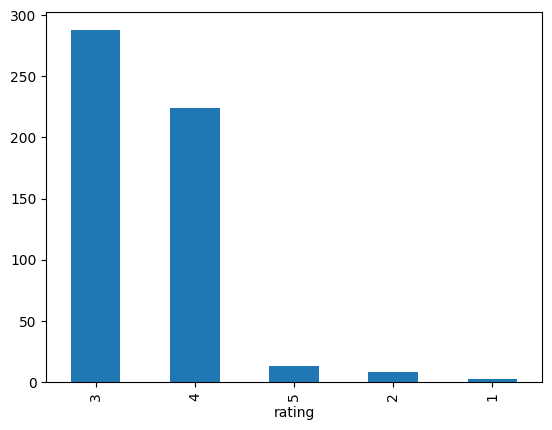

In [106]:
df['rating'].value_counts().plot(kind='bar')

In [108]:
df['processor_gnrtn'].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '12th'],
      dtype=object)

In [109]:
df['processor_gnrtn'] = df['processor_gnrtn'].str.replace('th', '', regex=False)

In [111]:
df['processor_gnrtn'].dtype

dtype('O')

In [112]:
df['processor_gnrtn'].value_counts()

,count
processor_gnrtn,
11,255
Not Available,144
10,101
8,27
7,6
9,1
12,1


In [110]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,34649,2,3,0
1,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,38999,3,65,5
2,Lenovo,Intel,Core i3,10,4,DDR4,0,1024,Windows,64,0,Casual,No warranty,No,No,39999,3,8,1
3,ASUS,Intel,Core i5,10,8,DDR4,512,0,Windows,32,2,Casual,No warranty,No,No,69990,3,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0,Casual,No warranty,No,No,26990,3,0,0


In [113]:
df.corr(numeric_only=True)

,ram_gb,ssd,hdd,os_bit,graphic_card_gb,Price,rating,Number of Ratings,Number of Reviews
ram_gb,1.000000,0.271981,-0.163387,0.145932,0.197684,0.382671,0.029341,-0.052967,-0.033831
ssd,0.271981,1.000000,-0.630350,0.201684,0.353242,0.649545,0.053813,-0.116574,-0.078201
hdd,-0.163387,-0.630350,1.000000,-0.155462,-0.128052,-0.317688,-0.096115,0.060008,0.026818
os_bit,0.145932,0.201684,-0.155462,1.000000,-0.061168,0.051808,0.089044,0.108660,0.103938
graphic_card_gb,0.197684,0.353242,-0.128052,-0.061168,1.000000,0.479992,0.011584,-0.089207,-0.039137
Price,0.382671,0.649545,-0.317688,0.051808,0.479992,1.000000,-0.060461,-0.241632,-0.172233
rating,0.029341,0.053813,-0.096115,0.089044,0.011584,-0.060461,1.000000,0.408900,0.410721
Number of Ratings,-0.052967,-0.116574,0.060008,0.108660,-0.089207,-0.241632,0.408900,1.000000,0.892409
Number of Reviews,-0.033831,-0.078201,0.026818,0.103938,-0.039137,-0.172233,0.410721,0.892409,1.000000


<Axes: >

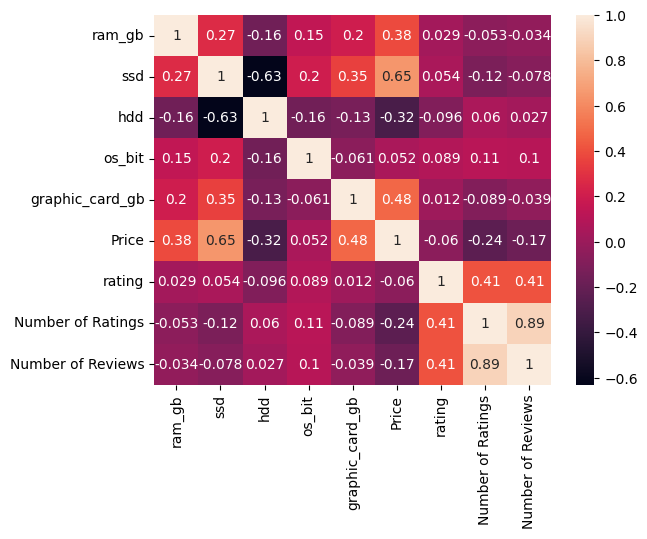

In [114]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

#Make Model

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
#First do X and y  split
X=df.drop('Price', axis=1)
y=df['Price'].copy()

In [119]:
#Second make train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
#split numeric and categorical values
num_feature = X_train.select_dtypes(include=[np.number]).columns
cat_feature = X_train.select_dtypes(exclude=[np.number]).columns

In [125]:
#make pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_feature),
    ('cat', cat_pipeline, cat_feature)
])

estimator=LinearRegression()

full_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('estimator', estimator)
])

In [126]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object'))])),
                ('estimator', LinearRegression())])

In [127]:
full_pipeline.score(X_train, y_train), full_pipeline.score(X_test, y_test)

(0.8111613945279887, 0.8406220563008162)

In [128]:
from sklearn.model_selection import cross_val_score
cross_val_score(full_pipeline, X_train, y_train, cv=5)

array([0.79022607, 0.66637321, 0.68305114, 0.71442324, 0.71358646])

#Random forest Regressor

In [161]:
estimator_1=RandomForestRegressor(random_state=42, n_estimators=200, min_samples_split=3,min_samples_leaf=2,max_depth=10)

full_pipeline_1 = Pipeline([
    ('preprocessing', transformer),
    ('estimator_1', estimator_1)
])

full_pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object'))])),
                ('estimator_1',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=3, n_estimators=200,
                                       random_state=42))])

In [162]:
full_pipeline_1.score(X_train, y_train), full_pipeline_1.score(X_test, y_test)

(0.9095794390285488, 0.8650930922079606)

In [132]:
from sklearn.model_selection import GridSearchCV
params={
    'estimator_1__n_estimators': [50,100,200],
    'estimator_1__max_depth': [ 10, 20, 30],
    'estimator_1__min_samples_split': [2, 5, 10],
    'estimator_1__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(full_pipeline_1, params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleI...
                                                                         Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object'))])),
                                       ('estimator_1',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'estimator_1__max_depth': [10, 20, 30],
                         'estimator_1__min_samples_leaf': [1, 2, 4],
                         'estimator_1__min_samples_split': [2, 5, 10],
                         'estimator_1__n_estimators': [50, 100, 200]})

In [133]:
grid_search.best_params_

{'estimator_1__max_depth': 10,
 'estimator_1__min_samples_leaf': 1,
 'estimator_1__min_samples_split': 2,
 'estimator_1__n_estimators': 100}

In [153]:
y_pred=full_pipeline_1.predict(X_test)

In [154]:
y_pred[:10]

array([ 34113.40720771,  65566.14726064,  63785.17391305,  74741.99130749,
        39114.49569939, 108482.33747306,  32510.04320503,  89707.78958658,
        78704.05683852,  57762.1671164 ])

In [155]:
y_test[:10]

,Price
192,29999
218,67990
250,49990
360,73519
138,38990
509,121890
6,21990
750,81490
283,84990
85,54238


In [156]:
r2_score(y_test, y_pred)

0.8653028123721117

In [157]:
mse = mean_squared_error(y_test, y_pred)
mse

101836287.60306698

In [159]:
from sklearn.metrics import mean_absolute_error

In [160]:
mae = mean_absolute_error(y_test, y_pred)
mae

7292.157912395555

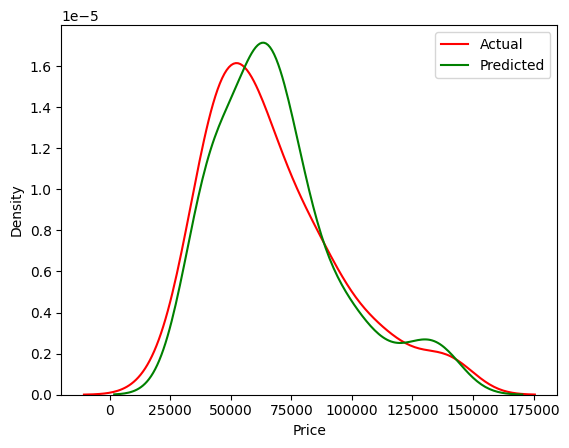

In [184]:
sns.kdeplot(y_test, color='red', label='Actual')
sns.kdeplot(y_pred, color='green', label='Predicted')
plt.legend()
plt.show()


#Decision tree regressor

In [178]:
estimator_2=DecisionTreeRegressor(random_state=42,  min_samples_split=3,min_samples_leaf=5,max_depth=15)

full_pipeline_2 = Pipeline([
    ('preprocessing', transformer),
    ('estimator_2', estimator_2)
])

full_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object'))])),
                ('estimator_2',
                 DecisionTreeRegressor(max_depth=15, min_samples_leaf=5,
                                       min_samples_split=3, random_state=42))])

In [179]:
full_pipeline_2.score(X_train, y_train), full_pipeline_2.score(X_test, y_test)


(0.8292360163575386, 0.7631676709125274)

In [180]:
y_prediction=full_pipeline_2.predict(X_test)

In [181]:
mae = mean_absolute_error(y_test, y_prediction)
mae

9155.93181278742

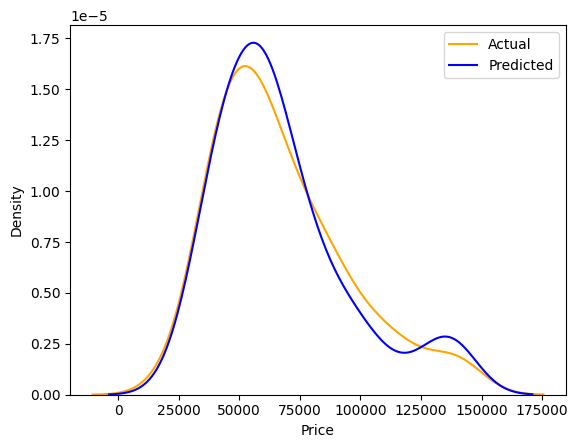

In [183]:
sns.kdeplot(y_test, color='orange', label='Actual')
sns.kdeplot(y_prediction, color='blue', label='Predicted')
plt.legend()
plt.show()


#Ridge and Lasso Model

In [214]:
from sklearn.linear_model import Ridge, Lasso
estimator_3=Ridge(alpha=0.005)

full_pipeline_3 = Pipeline([
    ('preprocessing', transformer),
    ('estimator_3', estimator_3)
])

full_pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object'))])),
                ('estimator_3', Ridge(alpha=0.005))])

In [215]:
full_pipeline_3.score(X_train, y_train), full_pipeline_3.score(X_test, y_test)

(0.8111536371666976, 0.8434810648173237)

In [220]:
estimator_4=Lasso(alpha=1)

full_pipeline_4 = Pipeline([
    ('preprocessing', transformer),
    ('estimator_4', estimator_4)
])

full_pipeline_4.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.351e+08, tolerance: 3.716e+07
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object'))])),
                ('estimator_4', Lasso(alpha=1))])

In [221]:
full_pipeline_4.score(X_train, y_train), full_pipeline_4.score(X_test, y_test)

(0.8111415520961984, 0.8004574021516359)

In [222]:
y_predd=full_pipeline_4.predict(X_test)

In [223]:
r2_score(y_test, y_predd)

0.8004574021516359

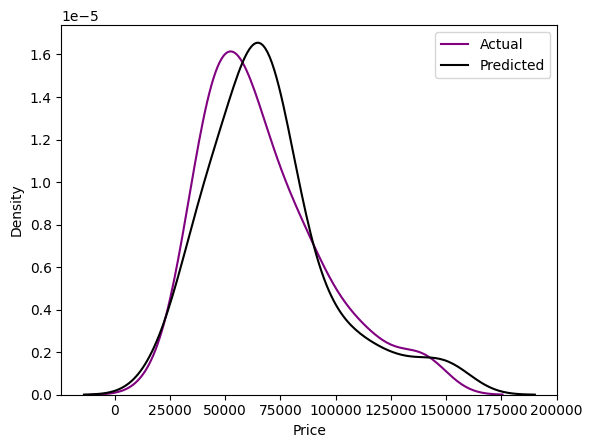

In [225]:
sns.kdeplot(y_test, color='purple', label='Actual')
sns.kdeplot(y_predd, color='black', label='Predicted')
plt.legend()
plt.show()

# GradientBoostingRegressor Model

In [226]:
from sklearn.ensemble import GradientBoostingRegressor

In [228]:
estimator_5 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
full_pipeline_5 = Pipeline([
    ('preprocessing', transformer),
    ('estimator_5', estimator_5)
])
full_pipeline_5.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_type', 'os', 'weight', 'warranty', 'Touchscreen', 'msoffice'],
      dtype='object'))])),
                ('estimator_5', GradientBoostingRegressor(random_state=42))])

In [229]:
y_pre = full_pipeline_5.predict(X_test)
mse = mean_squared_error(y_test, y_pre)
print("Mean Squared Error:", mse)

Mean Squared Error: 120761746.0749034


In [230]:
mae = mean_absolute_error(y_test, y_pre)
mae

7991.353296618073

In [231]:
r2_score(y_test, y_pre)

0.8402704188046936

In [232]:
full_pipeline_5.score(X_train, y_train), full_pipeline_5.score(X_test, y_test)

(0.8949739858821849, 0.8402704188046936)

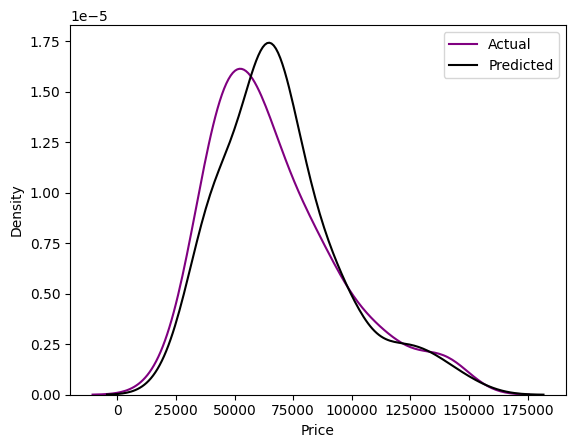

In [233]:
sns.kdeplot(y_test, color='purple', label='Actual')
sns.kdeplot(y_pre, color='black', label='Predicted')
plt.legend()
plt.show()
#